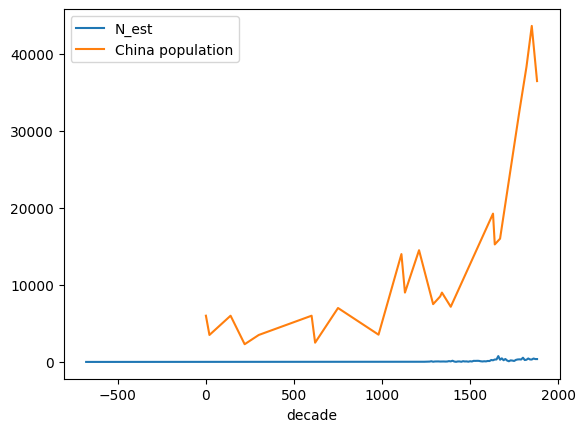

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


data = pd.read_csv("../../unseen_species_model/results/estimations_charles_big_regions.csv")
data = data[data['region']=='Chinese world']
data.plot(x='decade', y='N_est', kind='line')
data = pd.read_csv('../results/occupation/unseen_data_occupation.csv', index_col=0)
data = data.drop(['occupation', 'model_type'], axis=1)
data = data.groupby(['region_name', 'decade']).sum().reset_index()
data_sorted = data.sort_values(by='count_cps', ascending=False)
data_sorted = data_sorted[data_sorted['region_name'] == 'Chinese world']
#data_sorted = data_sorted.rename(columns={'region_name': 'region'})
#data_sorted.to_csv('../data/china_unseen.csv')



poplation_china = pd.read_csv('../data/china_population.csv')
poplation_china = poplation_china[['year', 'population']]
poplation_china['decade'] = (poplation_china['year'] // 10) * 10
poplation_china = poplation_china.drop('year', axis=1)
poplation_china = poplation_china[poplation_china['decade']<=1880]


# Interpolate population values for every decade from 0 to 1880
df_interpolated_years = pd.DataFrame({'decade':list(range(0, 1890, 10))})
df_interpolated_years = pd.merge(df_interpolated_years, poplation_china, on = 'decade', how = 'outer')
df_interpolated_years['population'] =df_interpolated_years['population'].interpolate(method='linear')
df_interpolated_years.plot(x='decade', y='population', kind='line', ax=plt.gca(), label='China population')
#df_interpolated_years['region_name'] = 'Chinese world'
#df_interpolated_years = df_interpolated_years.rename(columns={'decade':'year'})
#df_interpolated_years.to_csv('../data/china_population_clean.csv')

import numpy as np
data_sorted = pd.merge(data_sorted, df_interpolated_years, on = 'decade')
data_sorted['N_est_capita'] = data_sorted['N_est']/data_sorted['population']
data_sorted['log10_N_est_capita'] = np.log10(data_sorted['N_est_capita'])
data_sorted['log10_N_est'] = np.log10(data_sorted['N_est_capita'])
data_sorted['N_est_capita_multiply_10000'] =data_sorted['N_est_capita']*10000


In [114]:




data_sorted.to_clipboard()


#test = data_sorted.sort_values(by='decade', inplace=True)




In [ ]:



test = test[['decade', 'count_cps', 'N_est','N_est_capita', 'population']]
test.to_csv('test.csv')

,region_name_x,decade,count_cps,N_est,lower,upper,population,region_name_y,N_est_capita
0,Chinese world,1660,82,817.553997,722.145306,916.279267,15750.000000,Chinese world,0.051908
1,Chinese world,1800,67,635.190647,562.840259,712.888868,35446.000000,Chinese world,0.017920
2,Chinese world,1860,54,536.157846,472.659541,602.240793,41223.333333,Chinese world,0.013006
3,Chinese world,1830,52,502.740326,445.515809,563.382360,40076.666667,Chinese world,0.012544
4,Chinese world,1680,50,487.404646,430.974458,545.582357,17515.000000,Chinese world,0.027828
...,...,...,...,...,...,...,...,...,...
148,Chinese world,170,1,3.870928,3.073293,4.762571,4612.500000,Chinese world,0.000839
149,Chinese world,180,1,3.776421,3.009975,4.626432,4150.000000,Chinese world,0.000910
150,Chinese world,190,1,3.683050,2.953402,4.499646,3687.500000,Chinese world,0.000999
151,Chinese world,250,1,3.184523,2.631089,3.791673,2750.000000,Chinese world,0.001158


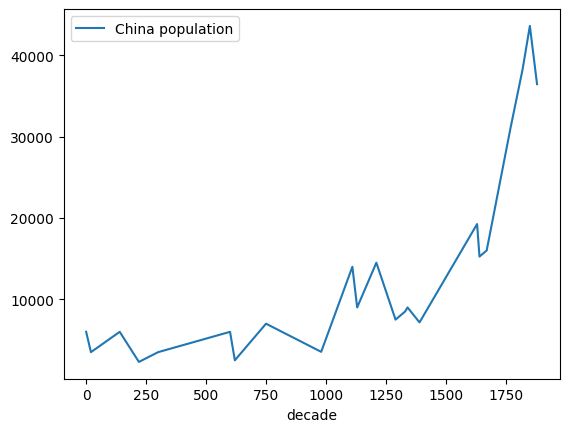

,population,decade
0,6000,0
1,3500,20
2,6000,140
3,2300,220
4,3500,300
5,6000,600
6,2500,620
7,7000,750
8,3540,980
9,14000,1110


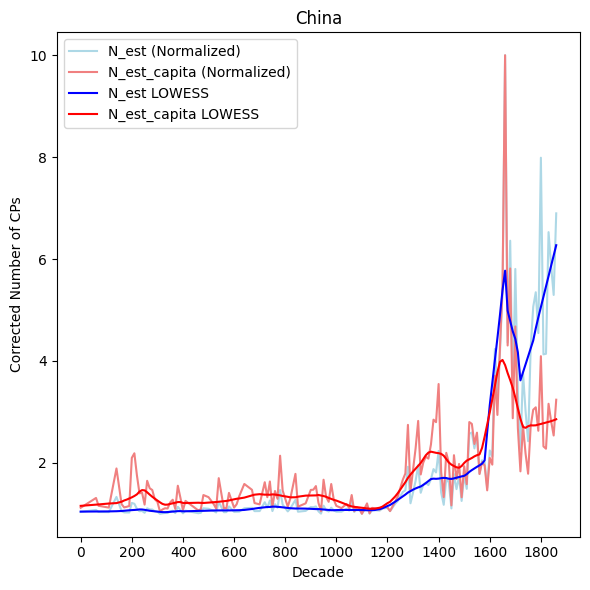

In [115]:


from sklearn.preprocessing import MinMaxScaler

# Normalize columns 'N_est' and 'N_est_capita' from 0 to 1
scaler = MinMaxScaler((1, 10))
data_sorted[['N_est']] = scaler.fit_transform(data_sorted[['N_est']])
data_sorted[['N_est_capita']] = scaler.fit_transform(data_sorted[['N_est_capita']])

# Sort the DataFrame by decade
data_sorted = data_sorted.sort_values(by='decade', ascending=True)

# Plotting
plt.figure(figsize=(6, 6))

# Plot N_est
plt.plot(data_sorted['decade'], data_sorted['N_est'], label='N_est (Normalized)', color='lightblue')

# Plot N_est_capita
plt.plot(data_sorted['decade'], data_sorted['N_est_capita'], label='N_est_capita (Normalized)', color='lightcoral')

# Smoothing using LOWESS for N_est
lowess_N_est = lowess(data_sorted['N_est'], data_sorted['decade'], frac=0.1)
plt.plot(lowess_N_est[:, 0], lowess_N_est[:, 1], label='N_est LOWESS', color='blue')

# Smoothing using LOWESS for N_est_capita
lowess_N_est_capita = lowess(data_sorted['N_est_capita'], data_sorted['decade'], frac=0.1)
plt.plot(lowess_N_est_capita[:, 0], lowess_N_est_capita[:, 1], label='N_est_capita LOWESS', color='red')

plt.title('China')
plt.xlabel('Decade')
plt.ylabel('Corrected Number of CPs')
plt.legend()
plt.grid(False)

# Set logarithmic scale on y-axis
#plt.yscale('log', base=10)


# Set ticks every 200 years
xticks = np.arange(0, 1900, 200)
plt.xticks(xticks)

plt.tight_layout()
plt.show()

<Axes: xlabel='decade'>

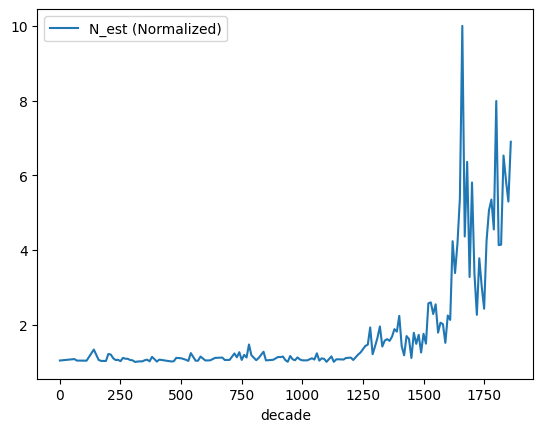

In [84]:
data_sorted.plot(x='decade', y='N_est', kind='line', label='N_est (Normalized)')

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib.ticker import ScalarFormatter


regions = ['Chinese world', 'United Kingdom']
regions = ['Chinese world', 'Western Europe']
filtered_data = data_sorted[data_sorted['region_name'].isin(regions)]
filtered_data = filtered_data[filtered_data['decade'] >= 0]
filtered_data = filtered_data.sort_values(['region_name', 'decade'])

filtered_data 

fig, ax = plt.subplots(figsize=(10, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Set the y-axis formatter to display full integers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

KeyError: 'region_name'